In [26]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import argparse
from sklearn import preprocessing
from sklearn.datasets.samples_generator import make_blobs

train_file = open('train.data')
test_file = open('test.data')

epochs = 3000
steps = 300

In [27]:
d_train = []
d_label = []
train_file.seek(0)
for line in train_file:
    line = line.rstrip('\n')
    lc = line.split(', ')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_train.append(line_l)
    if (lc[14] == '<=50K'):
        d_label.append(0)
    else:
        d_label.append(1)
d_train = preprocessing.scale(d_train)
d_train = np.c_[d_train, d_label]
    
d_test = []
test_file.seek(0)
for line in test_file:
    line = line.rstrip('\n')
    lc = line.split(',')
    line_l = [lc[0], lc[2], lc[4], lc[10], lc[11], lc[12]]
    d_test.append(line_l)
d_test = preprocessing.scale(d_test)

d_train = np.array(d_train, dtype = float)
d_test = np.array(d_test, dtype = float)

In [28]:
print(d_train.shape)
print(d_test.shape)
# print(d_train[0:10])
# print(np.mean(d_train[:, 1:2]))

(43958, 7)
(4884, 6)


In [31]:
def activation(x):
    return 1.0/(1 + np.exp(-x))

Start training... Alpha = 0.5000
Training epoch: 0 ~ 10 ...
Training epoch: 10 ~ 20 ...
Training epoch: 20 ~ 30 ...
Training epoch: 30 ~ 40 ...
Training epoch: 40 ~ 50 ...
Training epoch: 50 ~ 60 ...
Training epoch: 60 ~ 70 ...
Training epoch: 70 ~ 80 ...
Training epoch: 80 ~ 90 ...
Training epoch: 90 ~ 100 ...
0.1505170642107005 0.1499333431585635
Traning Complete.


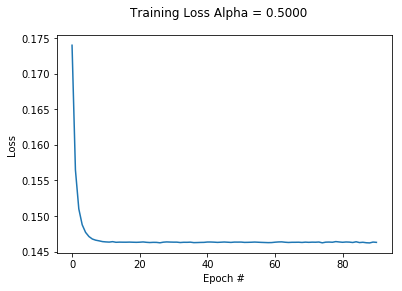

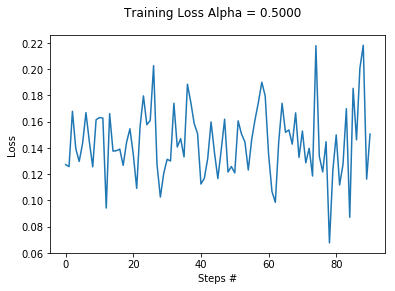

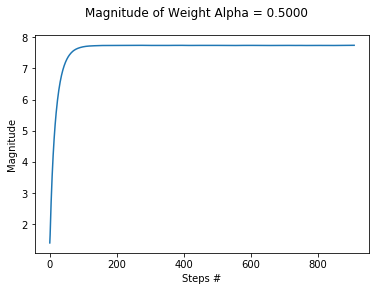

Start training... Alpha = 0.1000
Training epoch: 0 ~ 10 ...
Training epoch: 10 ~ 20 ...
Training epoch: 20 ~ 30 ...
Training epoch: 30 ~ 40 ...
Training epoch: 40 ~ 50 ...
Training epoch: 50 ~ 60 ...
Training epoch: 60 ~ 70 ...
Training epoch: 70 ~ 80 ...
Training epoch: 80 ~ 90 ...
Training epoch: 90 ~ 100 ...
Training epoch: 100 ~ 110 ...
Training epoch: 110 ~ 120 ...
Training epoch: 120 ~ 130 ...
Training epoch: 130 ~ 140 ...
Training epoch: 140 ~ 150 ...
Training epoch: 150 ~ 160 ...
Training epoch: 160 ~ 170 ...
Training epoch: 170 ~ 180 ...
Training epoch: 180 ~ 190 ...
Training epoch: 190 ~ 200 ...
Training epoch: 200 ~ 210 ...
Training epoch: 210 ~ 220 ...
Training epoch: 220 ~ 230 ...
Training epoch: 230 ~ 240 ...
Training epoch: 240 ~ 250 ...
Training epoch: 250 ~ 260 ...
Training epoch: 260 ~ 270 ...
Training epoch: 270 ~ 280 ...
Training epoch: 280 ~ 290 ...
Training epoch: 290 ~ 300 ...
Training epoch: 300 ~ 310 ...
Training epoch: 310 ~ 320 ...
Training epoch: 320 ~ 330 .

KeyboardInterrupt: 

In [45]:
lrs = [0.5, 0.25, 0.1, 0.05, 0.025, 0.01, 0.005, 0.0025, 0.001]
lrs = [0.5, 0.1]
epoch_counts = []
final_loss = []
weights = []
for learning_rate in lrs:
    print('Start training... Alpha = %.4f' % learning_rate)
    weight = np.random.uniform(size = (len(d_train[0]) - 1))
    loss_history = []
    step_loss_history = []
    mag_history = []
    prev_mag = 1
    prev_loss = 1
    epoch_count = 0
    
    for epoch in range(epochs):
        if (epoch%10 == 0):
            print('Training epoch:', epoch, '~', epoch + 10, '...')
            curr_mag = la.norm(weight)
            if (epoch > 30 and (curr_mag - prev_mag) < 0.001):
                break
            prev_mag = curr_mag
            
        epoch_loss = []
        step_loss = []
        np.random.shuffle(d_train)
        e_train = d_train[50:, 0:6]
        e_train_label = d_train[50:, 6:7].flatten()
        e_val = d_train[0:50, 0:6]
        e_val_label = d_train[0:50, 6:7].flatten()
        
        for step in range(steps):
            preds = activation(e_train.dot(weight))
            error = preds - e_train_label
            loss = np.sum(error**2)/len(e_train_label)
            epoch_loss.append(loss)
            gradient = e_train.T.dot(error)/e_train.shape[0]
            weight += -learning_rate*gradient
            if (step%30 == 0):
                preds_side = activation(e_val.dot(weight))
                error_side = preds_side - e_val_label
                loss_side = np.sum(error_side**2)/len(e_val_label)
                step_loss.append(loss_side)
                mag_history.append(la.norm(weight))
                
        epoch_count += 1
        loss_history.append(np.mean(epoch_loss))
        step_loss_history.append(np.mean(step_loss))
        
#         if (epoch%10 == 0):
#             curr_loss = np.mean(step_loss)
#             if (epoch > 30 and abs(curr_loss - prev_loss) < 0.001):
#                 print(curr_loss, prev_loss)
#                 break
#             prev_loss = curr_loss
        
    final_loss.append(round(loss_history[-1], 4))
    epoch_counts.append(epoch_count)
    weights.append(weight)
    print('Traning Complete.')
    
    fig = plt.figure()
    plt.plot(np.arange(0, epoch_count), loss_history)
    fig.suptitle('Training Loss Alpha = %.4f' % learning_rate)
    plt.xlabel("Epoch #")
    plt.ylabel("Loss")
    plt.show()
    fig = plt.figure()
    plt.plot(np.arange(0, len(step_loss_history)), step_loss_history)
    fig.suptitle('Training Loss Alpha = %.4f' % learning_rate)
    plt.xlabel("Steps #")
    plt.ylabel("Loss")
    plt.show()
    fig = plt.figure()
    plt.plot(np.arange(0, epoch_count*steps/30), mag_history)
    fig.suptitle('Magnitude of Weight Alpha = %.4f' % learning_rate)
    plt.xlabel("Steps #")
    plt.ylabel("Magnitude")
    plt.show()
print(final_loss)
print(epoch_counts)


In [39]:
preds_test = activation(d_test.dot(weights[0]))
print(preds_test)

[0.50776806 0.55160669 0.24056853 ... 0.531747   0.54753826 0.99658588]


In [41]:
import csv
res = [['Example', 'Label']]
ct = 0
with open('weight3.txt', 'w') as f_weight:
    for item in weights:
        f_weight.write("%s\n" % item)
for lb in preds_test:
    row = []
    row.append("'%s'" %ct)
    if (lb < 0.5):
        row.append('<=50K')
    else:
        row.append('>50K')
    res.append(row)
    ct += 1
with open("output3.csv",'w', newline='') as resultFile:
    wr = csv.writer(resultFile)
    wr.writerows(res)

[INFO] starting training...


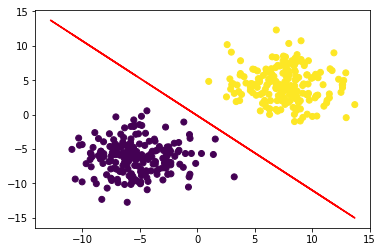

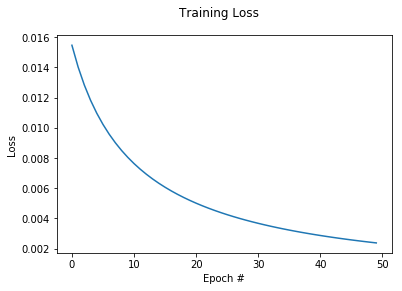

In [130]:
# USAGE
# python sgd.py

# import the necessary packages
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
import argparse

def sigmoid_activation(x):
    # compute and return the sigmoid activation value for a
    # given input value
    return 1.0 / (1 + np.exp(-x))

def next_batch(X, y, batchSize):
    # loop over our dataset `X` in mini-batches of size `batchSize`
    for i in np.arange(0, X.shape[0], batchSize):
        # yield a tuple of the current batched data and labels
        yield (X[i:i + batchSize], y[i:i + batchSize])

# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-e", "--epochs", type=float, default=100,
# 	help="# of epochs")
# ap.add_argument("-a", "--alpha", type=float, default=0.01,
# 	help="learning rate")
# ap.add_argument("-b", "--batch-size", type=int, default=32,
# 	help="size of SGD mini-batches")
# args = vars(ap.parse_args())

# generate a 2-class classification problem with 400 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=400, n_features=2, centers=2, cluster_std=2.5, random_state=95)

# insert a column of 1's as the first entry in the feature
# vector -- this is a little trick that allows us to treat
# the bias as a trainable parameter *within* the weight matrix
# rather than an entirely separate variable
X = np.c_[np.ones((X.shape[0])), X]

# initialize our weight matrix such it has the same number of
# columns as our input features
print("[INFO] starting training...")
W = np.random.uniform(size=(X.shape[1],))
# initialize a list to store the loss value for each epoch
lossHistory = []

# loop over the desired number of epochs
for epoch in np.arange(0, 50):
    # initialize the total loss for the epoch
    epochLoss = []

    # loop over our data in batches
    for (batchX, batchY) in next_batch(X, y, 20):
        # take the dot product between our current batch of
        # features and weight matrix `W`, then pass this value
        # through the sigmoid activation function
        preds = sigmoid_activation(batchX.dot(W))
        # now that we have our predictions, we need to determine
        # our `error`, which is the difference between our predictions
        # and the true values
        error = preds - batchY

        # given our `error`, we can compute the total loss value on
        # the batch as the sum of squared loss
        loss = np.sum(error ** 2)
        epochLoss.append(loss)

        # the gradient update is therefore the dot product between
        # the transpose of our current batch and the error on the
        # # batch
        gradient = batchX.T.dot(error) / batchX.shape[0]

        # use the gradient computed on the current batch to take
        # a "step" in the correct direction
        W += -0.05 * gradient

    # update our loss history list by taking the average loss
    # across all batches
    lossHistory.append(np.average(epochLoss))

# compute the line of best fit by setting the sigmoid function
# to 0 and solving for X2 in terms of X1
Y = (-W[0] - (W[1] * X)) / W[2]

# plot the original data along with our line of best fit
plt.figure()
plt.scatter(X[:, 1], X[:, 2], marker="o", c=y)
plt.plot(X, Y, "r-")

# construct a figure that plots the loss over time
fig = plt.figure()
plt.plot(np.arange(0, 50), lossHistory)
fig.suptitle("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()